In [21]:
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
name = "123TCB_CB" # choose the name 
    
dill.load_session('notebook_' + name + '.db')

tempdf = pickle.load(open('AlignmentDataFrames.p','rb'))

In [23]:
tempdf[name]['Alignment'] = AlignVec[0:len(tempdf[name]['GapSize'])]

adf = tempdf[name]

In [24]:
print(adf)

sortedadf = adf.sort_values('Alignment')
print('\n\nAnd the winner is...\n')
print(sortedadf)

#best = adf.loc[adf['Alignment'] == np.min(adf['Alignment'])]
#print('\n\nAnd the winner is...\n')
#print(best)
#minVec = np.array(adf['Alignment'])
#minVec = np.delete(minVec, np.where(minVec == np.min(minVec)))
#second = adf.loc[adf['Alignment'] == np.min(minVec)]
#print('\n\nSecond place to\n')
#print(second)

#minVec = np.delete(minVec, np.where(minVec == np.min(minVec)))
#third = adf.loc[adf['Alignment'] == np.min(minVec)]
#print('\n\nThird place to\n')
#print(third)

   GapSize  InkAmount  Speed  Alignment
0       30         50    0.1   0.415425
1       30         50    0.1   0.596229
2       15         50    0.1   0.593643
3       15         50    0.1   0.471050
4       15         75    0.1   0.487645
5       15         75    0.1   0.547964
6       15         75    1.0   0.613957
7       15         75    0.1   0.721350
8       15         75    0.1   0.765718


And the winner is...

   GapSize  InkAmount  Speed  Alignment
0       30         50    0.1   0.415425
3       15         50    0.1   0.471050
4       15         75    0.1   0.487645
5       15         75    0.1   0.547964
2       15         50    0.1   0.593643
1       30         50    0.1   0.596229
6       15         75    1.0   0.613957
7       15         75    0.1   0.721350
8       15         75    0.1   0.765718


In [37]:
#namesVec = ['1245TCB_CB', '135TBB_CB', '123TCB_CB', '1234TCB_CB', 'HMB_CB']
namesVec = ['135TCB_CB', '135TCB_chcl3', '135TCB_diheth', '135TCB_2oct', '135TCB_2dec', '135TCB_4eth']

DF = pd.DataFrame()

for name in namesVec:
    dill.load_session('notebook_' + name + '.db')
    tempdf = pickle.load(open('AlignmentDataFrames.p','rb'))
    tempdf[name]['Alignment'] = AlignVec[0:len(tempdf[name]['GapSize'])]
    adf = tempdf[name]
    
    best = adf.loc[adf['Alignment'] == np.min(adf['Alignment'])]
    best['Name'] = name
    DF = DF.append(best, ignore_index=True)
    
    minVec = np.array(adf['Alignment'])
    minVec = np.delete(minVec, np.where(minVec == np.min(minVec)))
    second = adf.loc[adf['Alignment'] == np.min(minVec)]
    second['Name'] = name
    #DF = DF.append(second, ignore_index=True)

#DF = DF.set_index('Name')
print(DF)
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


   GapSize  InkAmount  Speed  Alignment           Name
0       50         50    0.1   0.227141      135TCB_CB
1       10         75    2.0   0.226822   135TCB_chcl3
2       50         50    0.1   0.739182  135TCB_diheth
3       30         75    0.1   0.765725    135TCB_2oct
4       30         75    0.1   0.747213    135TCB_2dec
5       30         50    0.1   0.665349    135TCB_4eth


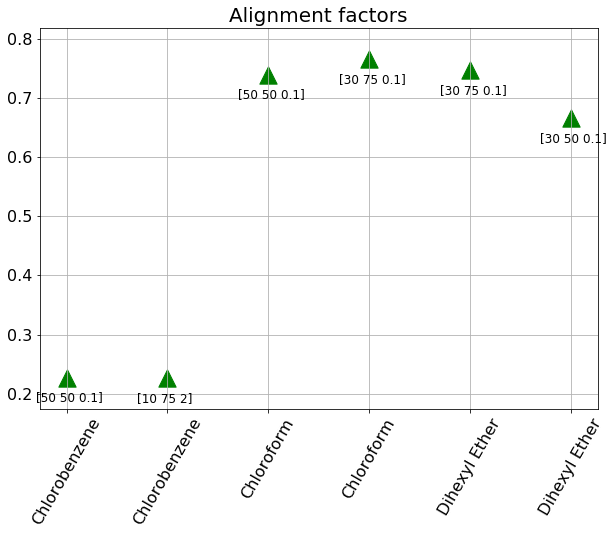

In [42]:
plt.figure(figsize=(10,7))
#xs = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5]
xs = np.arange(6)
plt.scatter(xs, DF['Alignment'],  marker='^', s=300, color='g')
my_xticks = ['Chlorobenzene', 'Chlorobenzene', 'Chloroform',
             'Chloroform', 'Dihexyl Ether', 'Dihexyl Ether',
             '2-Octanone', '2-Octanone', '2-Decanone', '2-Decanone',
             '4-Ethylcyclohexane', '4-Ethylcyclohexane']
plt.xticks(xs, my_xticks, rotation=60, fontsize=16)
plt.yticks(fontsize=16)
plt.title('Alignment factors', fontsize=20)
i = 0
for i in range(len(xs)):
    s = '[%d %d %.2g]' % (DF['GapSize'][i], DF['InkAmount'][i], DF['Speed'][i])
    if i % 2 == 0:
        de = 0.04
    else: de = 0.04
    plt.text(xs[i] - 0.3, DF['Alignment'][i] - de, s, fontsize=12)
    i += 1
plt.grid()
plt.savefig('figures/AlignFactor2.png')
plt.show()


In [7]:
folder = 'Analysis_2ndpart/different_C/'
name = "123TCB_CB" # choose the name 
    
dill.load_session(folder + 'notebook_' + name + '.db')

tempdf = pickle.load(open('AlignmentDataFramesPS.p','rb'))

In [8]:
tempdf[name]['Alignment'] = AlignVec[0:len(tempdf[name]['GapSize'])]

adf = tempdf[name]

In [9]:
print(adf)

sortedadf = adf.sort_values('Alignment')
print('\n\nAnd the winner is...\n')
print(sortedadf)

#best = adf.loc[adf['Alignment'] == np.min(adf['Alignment'])]
#print('\n\nAnd the winner is...\n')
#print(best)
#minVec = np.array(adf['Alignment'])
#minVec = np.delete(minVec, np.where(minVec == np.min(minVec)))
#second = adf.loc[adf['Alignment'] == np.min(minVec)]
#print('\n\nSecond place to\n')
#print(second)

#minVec = np.delete(minVec, np.where(minVec == np.min(minVec)))
#third = adf.loc[adf['Alignment'] == np.min(minVec)]
#print('\n\nThird place to\n')
#print(third)

    GapSize  InkAmount  Speed   PS  Alignment
0        30         50    0.1  100   0.229080
1        30         50    0.1  100   0.342338
2        15         50    0.1  100   0.207135
3        15         50    0.1  100   0.187526
4         5         50    0.1  100   0.112497
5         5         50    0.1  100   0.224994
6         5         30    0.1  100   0.112590
7         5         30    0.1  100   0.130875
8         5         75    0.1  100   0.327808
9         5         75    0.1  100   0.277444
10        5         50    0.5  100   0.288684
11        5         50    0.5  100   0.167735
12        5         50    0.1   50   0.180848
13        5         50    0.1   50   0.137851
14        5         75    0.1   50   0.180495
15        5         75    0.1   50   0.135714
16        5         30    0.1   50   0.114206
17        5         30    0.1   50   0.167964
18       15         50    0.1   50   0.157161
19       15         50    0.1   50   0.208841
20       30         50    0.1   50

In [10]:
PSvec = [1, 10, 50, 100]
DF = pd.DataFrame()

for ps in PSvec:
    nadf = adf.loc[adf['PS'] == ps]
    
    best = nadf.loc[adf['Alignment'] == np.min(nadf['Alignment'])]
    DF = DF.append(best, ignore_index=True)
    
    minVec = np.array(nadf['Alignment'])
    minVec = np.delete(minVec, np.where(minVec == np.min(minVec)))
    second = nadf.loc[nadf['Alignment'] == np.min(minVec)]
    DF = DF.append(second, ignore_index=True)

#DF = DF.set_index('Name')
print(DF)

   GapSize  InkAmount  Speed   PS  Alignment
0        5          7    0.1    1   0.246857
1        5         15    0.1    1   0.362842
2        5         30    0.5   10   0.377421
3        5         30    0.1   10   0.380637
4        5         30    0.1   50   0.114206
5       15         75    0.1   50   0.128088
6        5         50    0.1  100   0.112497
7        5         30    0.1  100   0.112590


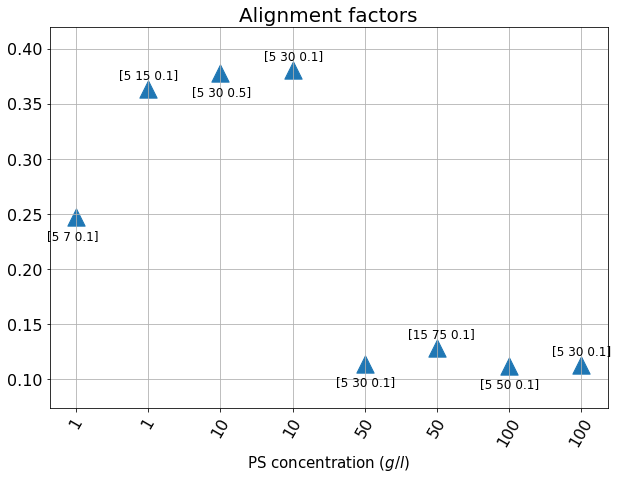

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(DF.index.values, DF['Alignment'],  marker='^', s=300)
my_xticks = DF['PS']
plt.xticks(DF.index.values, my_xticks, rotation=60, fontsize=16)
plt.yticks(fontsize=16)
plt.title('Alignment factors', fontsize=20)
plt.xlabel('PS concentration ($g/l$)', fontsize=15)
i = 0
for x in DF.index.values:
    s = '[%d %d %.2g]' % (DF['GapSize'][x], DF['InkAmount'][x], DF['Speed'][x])
    if i % 2 == 0:
        de = 0.02
    else: de = -0.01
    plt.text(x - 0.4, DF['Alignment'][x] - de, s, fontsize=12)
    i += 1
plt.grid()
plt.savefig('figures/AlignFactorPS1.png')
plt.show()
